In [1]:
# Data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Python
import glob
import os
import time

# Gensim
import gensim
from gensim.test.utils import datapath
from gensim.models import Word2Vec
from gensim import utils

# Global variables
DATA_PATH = os.getcwd().split("Devoir 3")[0] + "data\\"
MODEL_PATH = os.getcwd().split("Devoir 3")[0] + "models\\"

# 0. Get the data
Test with 1BWC short. I think we should read the core tutorials on [Gensim's documentation website](https://radimrehurek.com/gensim/auto_examples/index.html#documentation). 

Here's my opinion on how we could separate corpus / documents: 
1. The 10 different slices each represent a document, the corpus being the 10 slices. 
2. Concatenate all 10 slices, make that our corpus. Each sentence is a document. 
3. Same as 2., but we make sentence slices (10 sentences, 20 sentences, 100 sentences, etc.) as the documents. 

Gensim is smart, it allows us to load corpora into memory as lists, but also in [streaming](https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html#corpus-streaming-tutorial). We'll create our own class, as described in the tutorials. 

In [2]:
'''Test class for a singular corpus, I.E. a corpus that fits within a single file. 
Parameters
    data_path: The path to look for the data.

Returns a generator object to iterate over all the documents in the corpus once. 
'''
class SingularCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self, data_path):
        self.data_path = data_path

    def __iter__(self):
        corpus_path = datapath(self.data_path)
        for line in open(corpus_path, encoding="utf8"):
            # one document per line
            yield utils.simple_preprocess(line)

'''Test class for a sliced corpus, I.E. a corpus that is made up of multiple files. 
Parameters
    folder_path: The path to look for the folder containing the slices. It assumes that 
                 the folder contains only slices for this specific corpus. 

Returns a generator object to iterate over all the documents in the corpus once. 
'''
class SlicedCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self, folder_path):
        self.folder_path = folder_path

    def __iter__(self):
        for data_path in os.listdir(self.folder_path):
            corpus_path = datapath(self.folder_path + data_path)
            print(corpus_path)
            for line in open(corpus_path, encoding="utf8"):
                # one document per line
                yield utils.simple_preprocess(line)

# 0.a Framework architecture
In this section I'll work on developing a structure that makes it easy for us to test, train, save and evaluate models.

### Test with Slice 0 of 1BWC Short

**Training & Saving**

In [3]:
slice0 = SingularCorpus(DATA_PATH + "1bshort\\news.en-00000-of-00100.txt")

tic = time.perf_counter()
model = gensim.models.Word2Vec(sentences=slice0)
print(f"Training took {round(time.perf_counter() - tic, 2)}s.")
model.save(MODEL_PATH + "1bs-0-w2v.model")

Training took 107.36s.


**Loading, Word Vectors and Vocabulary**

In [4]:
model = Word2Vec.load(MODEL_PATH + "1bs-0-w2v.model")
wv = model.wv
vocab = wv.index_to_key
len(vocab)

37116

### Test with all slices from 1BWC short
**Training & Saving**
Since it took 95s to train on a single slice, it should take about 16 minutes.

In [5]:
onebwcshort = SlicedCorpus(DATA_PATH + "1bshort\\")

tic = time.perf_counter()
model = gensim.models.Word2Vec(sentences=onebwcshort)
print(f"Training took {round(time.perf_counter() - tic, 2)}s.")
model.save(MODEL_PATH + "1bs-all-w2v.model")

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\U

In [3]:
model = Word2Vec.load(MODEL_PATH + "1bs-all-w2v.model")
wv = model.wv
vocab = wv.index_to_key
len(vocab)

107374

## 1. Testing the Impact of the number of slices :

In [4]:
for i in range(1, 11):
    
    onebwcshort = SlicedCorpus(DATA_PATH + f"other\\{i}\\")

    tic = time.perf_counter()
    model = gensim.models.Word2Vec(sentences=onebwcshort)
    print(f"Training took {round(time.perf_counter() - tic, 2)}s.")
    model.save(MODEL_PATH + f"1bs-all-w2v-slice-0{i}.model")

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\1\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\1\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\1\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\1\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\1\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\1\news.en-00000-of-00100.txt
Training took 272.0s.
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\2\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\2\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\2\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\2\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\2\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\2\news.en-0

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\6\news.en-00001-of-00100.txt
C:\U

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\other\8\news.en-00000-of-00100.txt
C:\U

RuntimeError: you must first build vocabulary before training the model

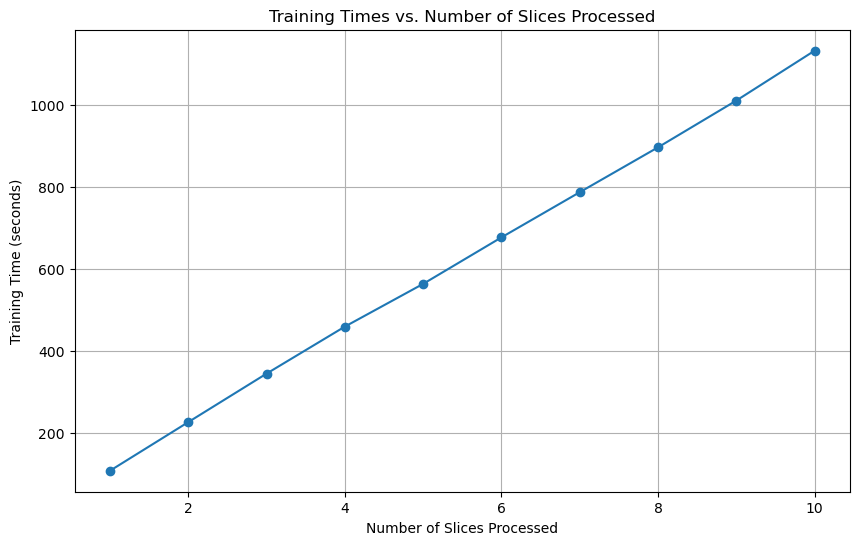

In [11]:
training_times = [108.92, 227.3, 345.34, 459.79, 563.85, 677.02, 787.01, 896.27, 1010.07, 1131.55]
slices = list(range(1, 11))

plt.figure(figsize=(10, 6))
plt.plot(slices, training_times, marker='o', linestyle='-')
plt.title("Training Times vs. Number of Slices Processed")
plt.xlabel("Number of Slices Processed")
plt.ylabel("Training Time (seconds)")
plt.grid(True)
plt.savefig("figure_1.png")

plt.show()

## Entraînement de plusieurs modèles

### Training different models with different minimum count values

In [7]:
onebwcshort = SlicedCorpus(DATA_PATH + "1bshort\\")

min_count_list = [200, 400, 600, 800, 1000]

for min_count in min_count_list:
    
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"Training a model with {min_count} as min_count... --------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------------------")
    tic = time.perf_counter()
    model_vector_size = gensim.models.Word2Vec(sentences=onebwcshort, min_count=min_count)
    print(f"Training took {round(time.perf_counter() - tic, 2)}s.")
    model.save(MODEL_PATH + f"1bs-all-w2v_MINCOUNT-{min_count}.model")

--------------------------------------------------------------------------------------------------------------
Training a model with 200 as min_count... --------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\U

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\U

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\U

### Training different models with different vector sizes

In [8]:
vector_size_list = [50, 100, 150, 200]

for vector_size in vector_size_list:
    
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"Training a model with {vector_size} as vector size... --------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------------------")
    tic = time.perf_counter()
    model_vector_size = gensim.models.Word2Vec(sentences=onebwcshort, vector_size=vector_size)
    print(f"Training took {round(time.perf_counter() - tic, 2)}s.")
    model.save(MODEL_PATH + f"1bs-all-w2v_vsize{vector_size}.model")

--------------------------------------------------------------------------------------------------------------
Training a model with 50 as vector size... --------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\U

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\U

### Training different models with different window_sizes

In [9]:
window_size_list = [2, 4, 6, 8]

for window_size in window_size_list:
    
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"Training a model with {window_size} as window size... --------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------------------")
    tic = time.perf_counter()
    model_vector_size = gensim.models.Word2Vec(sentences=onebwcshort, window = window_size)
    print(f"Training took {round(time.perf_counter() - tic, 2)}s.")
    model.save(MODEL_PATH + f"1bs-all-w2v_wsize-{window_size}.model")

--------------------------------------------------------------------------------------------------------------
Training a model with 2 as window size... --------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\U

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\U

C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00009-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00000-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00001-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00002-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00003-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00004-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00005-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00006-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00007-of-00100.txt
C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\1bshort\news.en-00008-of-00100.txt
C:\U

## 2 TOEFL Benchmark  

### Loading the TOEFL data

In [12]:
folder_path = r"C:\Users\barka\Desktop\NLP\ift6285-devoirs\data\wbst-nanews\byPL"  


file_list = [filename for filename in os.listdir(folder_path)]


dfs = []


for filename in file_list:
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as file:
        lines = file.readlines()
    

    data = []
    for line in lines:
        words = line.split()
        if len(words) >= 5:
            input_word = words[0]
            synonym = words[1]
            distractors = words[2:]
            data.append([input_word, synonym] + distractors)


            
    current_df = pd.DataFrame(data, columns=['Input', 'Synonym', 'Distractor1', 'Distractor2', 'Distractor3'])


    dfs.append(current_df)  
    

merged_df = pd.concat(dfs, ignore_index=True)
merged_df.head()

,Input,Synonym,Distractor1,Distractor2,Distractor3
0,select,quality,tacky,impressionist,lunar
1,crimson,violent,lebanese,orphan,conditioned
2,shocking,scandalous,fabricated,base,gathered
3,chic,smart,deadly,applied,divorced
4,sorry,sad,nineteen,rugged,toxic


In [ ]:
len(merged_df)

In [13]:
import numpy as np
from gensim.models import Word2Vec
from tqdm import tqdm

def evaluate_model(model_path, toefl_df):

    
    model = Word2Vec.load(model_path)

    
    def perform_word_analogy(row, model):
        input_word = row['Input']
        synonym = row['Synonym']
        distractors = [row['Distractor1'], row['Distractor2'], row['Distractor3']]


        closest_synonym = model.wv.most_similar_to_given(input_word, [synonym] + distractors)
        

        is_correct = closest_synonym == synonym

        return is_correct

    skipped = 0

    tqdm.pandas()


    correct_predictions = 0
    total_questions = len(toefl_df)


    for index, row in tqdm(toefl_df.iterrows(), total=total_questions, desc="Evaluating Model"):
        input_word = row['Input']
        synonym = row['Synonym']
        distractors = [row['Distractor1'], row['Distractor2'], row['Distractor3']]


        words_to_check = [input_word, synonym] + distractors
        if all(word in model.wv.key_to_index for word in words_to_check):
            is_correct = perform_word_analogy(row, model)
            if is_correct:
                correct_predictions += 1
        else:
            skipped += 1

    accuracy = correct_predictions / (total_questions - skipped)
    
    return accuracy, skipped/total_questions, correct_predictions

### Evaluating the model with gensim default parameters

In [14]:
accuracy, skipped, correct_predictions = evaluate_model(
    r"C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\1bs-all-w2v.model",
    merged_df
)

print("Accuracy:", accuracy)
print("Skipped:", skipped)
print("Correct predictions:", correct_predictions)

Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5286.45it/s]

Accuracy: 0.6234341789897345
Skipped: 0.06181586762834111
Correct predictions: 13786


### Impact of the training data size

In [15]:
slice_parameters = []
accuracies = []
skipped_counts = []
folder_path = r"C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\Slices"

# Get a list of all files in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
model_files = [f for f in file_names if f.endswith(".model")]

# Create a dictionary to store results
results = {}

# Use tqdm to add a progress bar for model evaluation
for model_file in model_files : 
    # Extract the slice parameter from the model file name
    slice_parameter = int(model_file.split("-")[4].split(".")[0])

    # Build the full path to the model file
    model_path = os.path.join(folder_path, model_file)

    # Evaluate the model and store the results in the dictionary
    accuracy, skipped, correct_predictions = evaluate_model(model_path, merged_df)
    
    slice_parameters.append(slice_parameter)
    accuracies.append(accuracy)
    skipped_counts.append(skipped)

Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5497.75it/s]


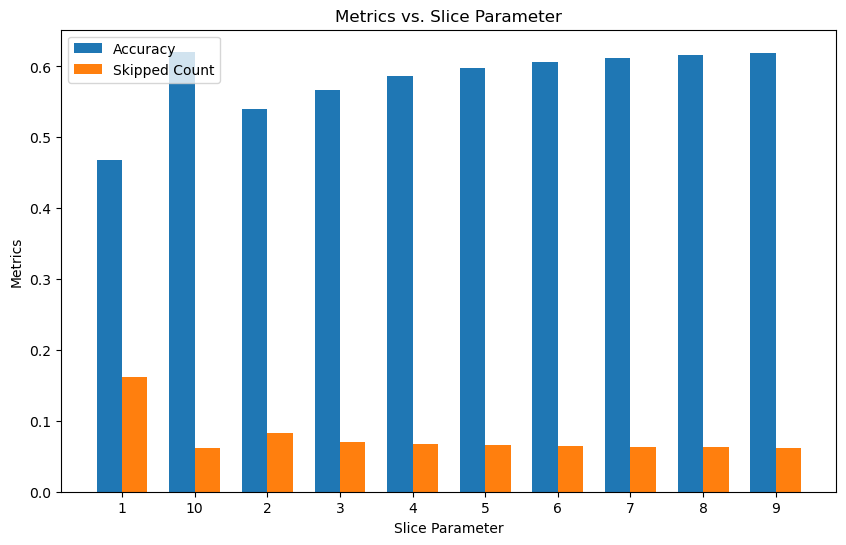

In [17]:
bar_width = 0.35  # Width of each bar
x = np.arange(len(slice_parameters))  # X-axis positions for bars

plt.figure(figsize=(10, 6))

# Plot "Accuracy" bars
plt.bar(x - bar_width/2, accuracies, bar_width, label="Accuracy")

# Plot "Skipped Count" bars
plt.bar(x + bar_width/2, skipped_counts, bar_width, label="Skipped Count")

plt.xlabel("Slice Parameter")
plt.ylabel("Metrics")
plt.xticks(x, slice_parameters)
plt.legend()
plt.title("Metrics vs. Slice Parameter")
plt.savefig("figure_2.png")
plt.show()

### Impact of the minimum count parameter

In [45]:
mincount_parameters = []
accuracies = []
skipped_counts = []
folder_path = r"C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\Min_count"

# Get a list of all files in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
model_files = [f for f in file_names if f.endswith(".model")]

# Create a dictionary to store results
results = {}

# Use tqdm to add a progress bar for model evaluation
for model_file in model_files : 
    # Extract the slice parameter from the model file name
    mincount_parameter = int(model_file.split("-")[3].split(".")[0])

    # Build the full path to the model file
    model_path = os.path.join(folder_path, model_file)

    # Evaluate the model and store the results in the dictionary
    accuracy, skipped, correct_predictions = evaluate_model(model_path, merged_df)
    
    mincount_parameters.append(mincount_parameter)
    accuracies.append(accuracy)
    skipped_counts.append(skipped)

Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 4918.05it/s]


In [46]:
tmp = accuracies[0]
accuracies = accuracies[1:]
accuracies.append(tmp)

tmp = mincount_parameters[0]
mincount_parameters = mincount_parameters[1:]
mincount_parameters.append(tmp)

In [47]:
accuracies

[0.6182829744888728,
 0.6182829744888728,
 0.6182829744888728,
 0.6182829744888728,
 0.6182829744888728]

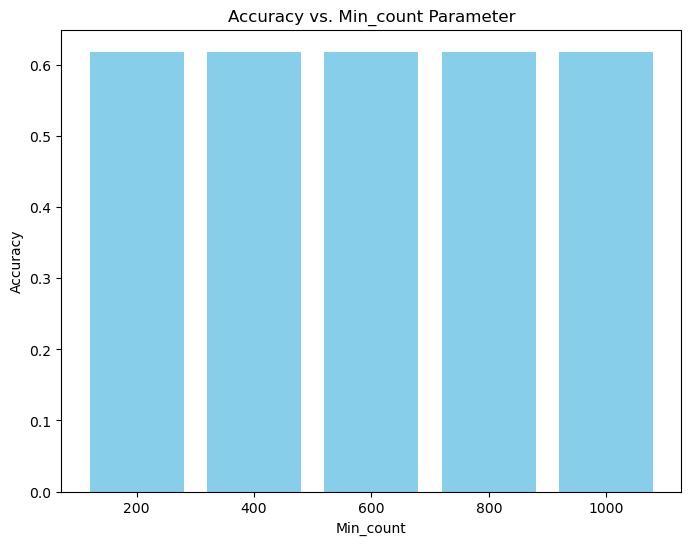

In [48]:
plt.figure(figsize=(8, 6))  # Adjust the figure size

plt.bar([str(num) for num in mincount_parameters], accuracies, color='skyblue')
plt.xlabel("Min_count")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Min_count Parameter")

plt.xticks([str(num) for num in mincount_parameters])  # Display all parameter values on the x-axis
plt.savefig("figure_3")
plt.show()

### Impact of the vector size parameter 

In [68]:
embedd_parameters = []
accuracies = []
skipped_counts = []
folder_path = r"C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\Embbed_Size"

# Get a list of all files in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
model_files = [f for f in file_names if f.endswith(".model")]



# Create a dictionary to store results
results = {}

# Use tqdm to add a progress bar for model evaluation
for model_file in model_files : 
    
    # Extract the slice parameter from the model file name
    embedd_parameter = int(model_file.split("-")[3].split(".")[0])

    # Build the full path to the model file
    model_path = os.path.join(folder_path, model_file)
    
    print(model_path)

    # Evaluate the model and store the results in the dictionary
    accuracy, skipped, correct_predictions = evaluate_model(model_path, merged_df)
    
    embedd_parameters.append(embedd_parameter)
    accuracies.append(accuracy)
    skipped_counts.append(skipped)

C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\Embbed_Size\1bs-all-w2v_vsize-100.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5489.43it/s]


C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\Embbed_Size\1bs-all-w2v_vsize-150.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5196.43it/s]


C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\Embbed_Size\1bs-all-w2v_vsize-200.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5415.23it/s]


C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\Embbed_Size\1bs-all-w2v_vsize-50.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:03<00:00, 6170.61it/s]


In [69]:
tmp = accuracies[0]
accuracies = accuracies[1:]
accuracies.append(tmp)

tmp = mincount_parameters[0]
embedd_parameters = embedd_parameters[1:]
embedd_parameters.append(tmp)

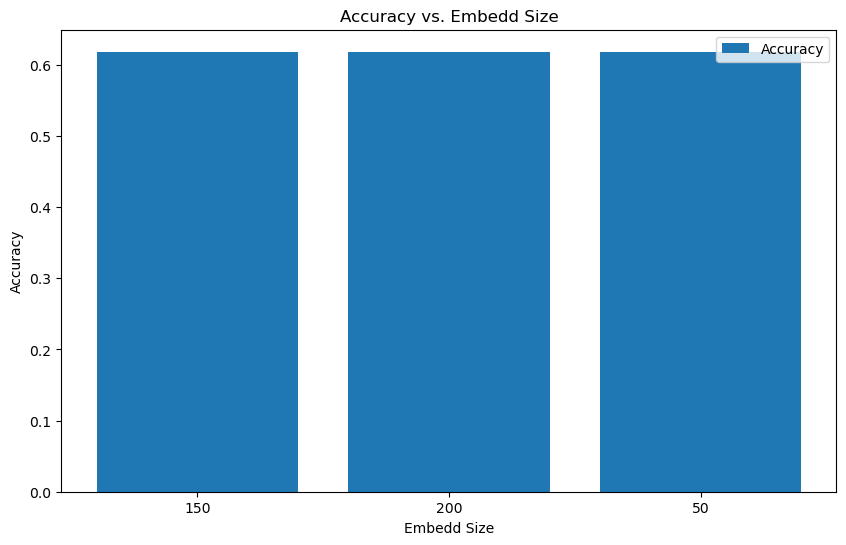

In [70]:
plt.figure(figsize=(10, 6))
plt.bar([str(num) for num in embedd_parameters], accuracies, label="Accuracy")

plt.xlabel("Embedd Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs. Embedd Size")
plt.savefig("figure_4.png")
plt.show()

In [62]:
window_parameters = []
accuracies = []
skipped_counts = []
folder_path = r"C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\wsize"

# Get a list of all files in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
model_files = [f for f in file_names if f.endswith(".model")]



# Create a dictionary to store results
results = {}

# Use tqdm to add a progress bar for model evaluation
for model_file in model_files : 
    
    # Extract the slice parameter from the model file name
    window_parameter = int(model_file.split("-")[3].split(".")[0])

    # Build the full path to the model file
    model_path = os.path.join(folder_path, model_file)
    
    print(model_path)

    # Evaluate the model and store the results in the dictionary
    accuracy, skipped, correct_predictions = evaluate_model(model_path, merged_df)
    
    window_parameters.append(window_parameter)
    accuracies.append(accuracy)
    skipped_counts.append(skipped)

C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\wsize\1bs-all-w2v_wsize-10.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5421.61it/s]


C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\wsize\1bs-all-w2v_wsize-2.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5550.60it/s]


C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\wsize\1bs-all-w2v_wsize-4.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5234.38it/s]


C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\wsize\1bs-all-w2v_wsize-6.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5321.17it/s]


C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\wsize\1bs-all-w2v_wsize-8.model


Evaluating Model: 100%|████████████████████████████████████████████████████████| 23570/23570 [00:04<00:00, 5633.93it/s]


In [65]:
tmp = accuracies[0]
accuracies = accuracies[1:]
accuracies.append(tmp)

tmp = mincount_parameters[0]
window_parameters = window_parameters[1:]
window_parameters.append(tmp)

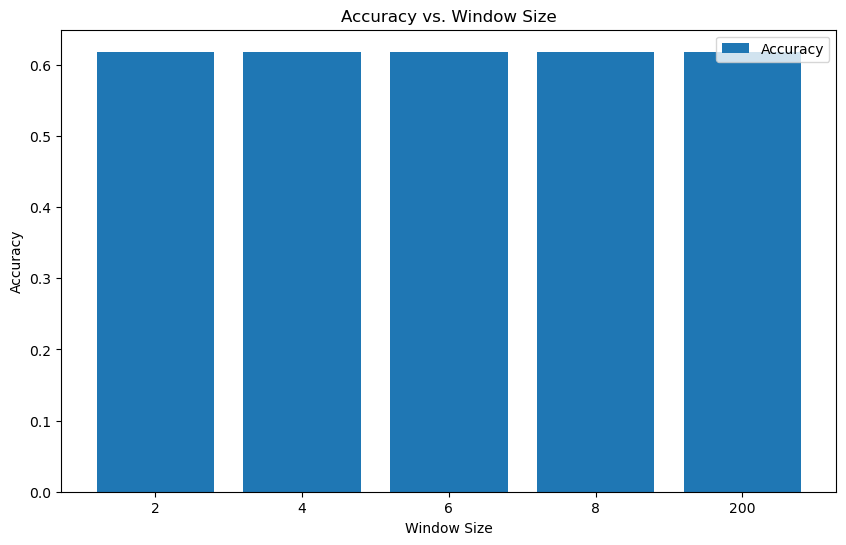

In [67]:
plt.figure(figsize=(10, 6))
plt.bar([str(num) for num in window_parameters], accuracies, label="Accuracy")

plt.xlabel("Window Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs. Window Size")
plt.savefig("figure_5.png")
plt.show()

## 3 Voisins
Appliqué pour un seul modèle. J'imagine qu'on serait mieux d'utiliser notre meilleur modèle. 

In [60]:
# List of words for which you want to find neighbors
model = Word2Vec.load(r"C:\Users\barka\Desktop\NLP\ift6285-devoirs\models\1bs-all-w2v.model")

with open("list_words_test.txt", "r") as word_file:
    word_list = [line.strip() for line in word_file]

# Create a dictionary to store the neighbors and their similarity scores
neighbors_dict = {}

# Iterate over each word in the list
for word in word_list:
    try:
        # Find the most similar words and their similarity scores
        similar_words = model.wv.most_similar(word)
        
        # Format the results as requested
        neighbors_str = ' '.join([f'{neighbor} [{score:.2f}]' for neighbor, score in similar_words])
        neighbors_dict[word] = neighbors_str
    except KeyError:
        neighbors_dict[word] = "Word not in vocabulary"

# Save the results to a file
with open("voisins-Barkat_Youcef_Islam-Louis_Vincent_Poellhuber.txt", "w", encoding="utf-8") as output_file:
    for word, neighbors in neighbors_dict.items():
        output_file.write(f"{word}\t{neighbors}\n")

print("Neighbor calculation and file writing completed.")

Neighbor calculation and file writing completed.
